# Mental Health Survey in Tech - Data Exploration and Cleaning

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.  
**Source**: https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [1]:
import pandas as pd
import altair as alt
#alt.themes.enable('latimes')
%load_ext watermark
%watermark --iversions -w -v -u -d -m

altair 3.3.0
pandas 0.25.1
last updated: 2019-11-29 

CPython 3.6.9
IPython 7.5.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
watermark 2.0.2


## Read data in

In [2]:
tech = pd.read_csv('../data/mental_health_tech_data.csv', sep=',')
tech.head(2)

Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   

  family_history treatment work_interfere    no_employees  ...          leave  \
0             No       Yes          Often            6-25  ...  Somewhat easy   
1             No        No         Rarely  More than 1000  ...     Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   

  obs_consequence comments  
0              No      NaN  
1              No      NaN  

[2 rows x 27 columns]

## Dataset metadata

In [3]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

## Dataset missing values

In [4]:
tech.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
tech_d = tech.dropna(axis='columns')
tech_d.shape

(1259, 23)

In [6]:
tech_d.head(2)

Timestamp  Age  Gender        Country family_history treatment  \
0  2014-08-27 11:29:31   37  Female  United States             No       Yes   
1  2014-08-27 11:29:37   44       M  United States             No        No   

     no_employees remote_work tech_company    benefits  ...   anonymity  \
0            6-25          No          Yes         Yes  ...         Yes   
1  More than 1000          No           No  Don't know  ...  Don't know   

           leave mental_health_consequence phys_health_consequence  \
0  Somewhat easy                        No                      No   
1     Don't know                     Maybe                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  

[2 rows x 23 columns]

In [7]:
tech_d.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## Select and clean features

In [8]:
# we will drop some features because require too much pre-processing for our current purposes
# TL;DR: ain't nobody got time for that
to_drop = ['Timestamp', 'no_employees', 'Gender', 'Country'] 
tech_d = tech_d.drop(to_drop, axis=1)

In [9]:
# we reduced the dataset to 19 features
tech_d.shape 

(1259, 19)

In [10]:
# we have only one quantitative variable
tech_d.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

## 

The values of age do not make sense. Looks like wehave negative values and values over 100
Let's clean that up a bit

In [11]:
# keep ages <= 100 AND >= 15
tech_d = tech_d[(tech_d['Age'] <= 100) & (tech_d['Age'] >= 15)] 
tech_d.describe()

Age
count  1251.000000
mean     32.076739
std       7.288272
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000

In [12]:
# check balance of target feature
tech_d['treatment'].value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

## Explore variables

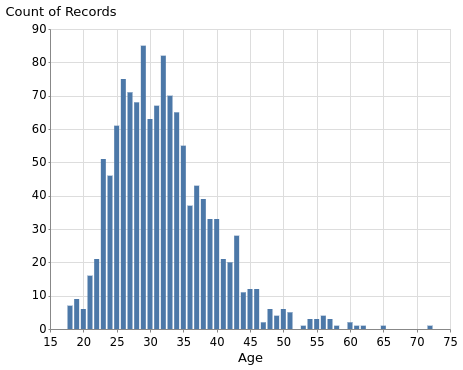

In [13]:
# for real value variables histograms work great
hist_1 = alt.Chart(tech_d).mark_bar().encode(
    x='Age',
    y='count()')
hist_1

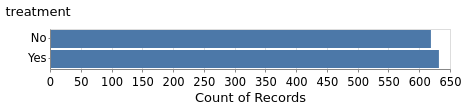

In [14]:
# for categorical variables we use counts is a good idea
bar_1 = alt.Chart(tech_d).mark_bar().encode(
    x='count()',
    y='treatment:N')
bar_1

At this point we realize that we need to create a reusable function if we want to continue doing multiple similar plots. this is what we call **'refactoring'** the code. 

In [15]:
def plot_cat(variable: str) -> 'Chart':
    '''plot categorical variables
    Parameters:
    variable: variable name 
    ---
    Returns:
    Altair bar chart
    '''
    chart = alt.Chart(tech_d).mark_bar().encode(
        x='count()',
        y=variable,
        color=alt.Color(variable, legend=None))
    return chart

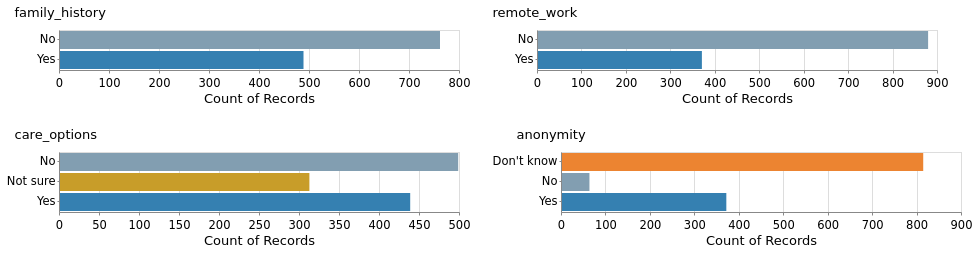

In [16]:
# we can concatenate charts together pretty easily
panel_chart1 = (plot_cat('family_history') | plot_cat('remote_work')) & (plot_cat('care_options')  | plot_cat('anonymity')) 
panel_chart1

Now let's plot the same variables grouped by treatment (target).

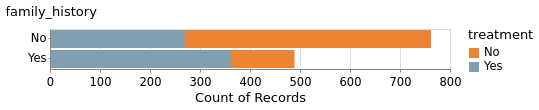

In [17]:
bar_2= alt.Chart(tech_d).mark_bar().encode(
    x='count()',
    y='family_history',
    color='treatment')
bar_2

Nice, now we can refactor the code as before to make multiple plots.

In [18]:
def plot_grouped_cat(variable:str)-> 'Chart':
    chart =alt.Chart(tech_d).mark_bar().encode(
        x='count()',
        y=variable,
        color=alt.X('treatment:N'))
    return chart

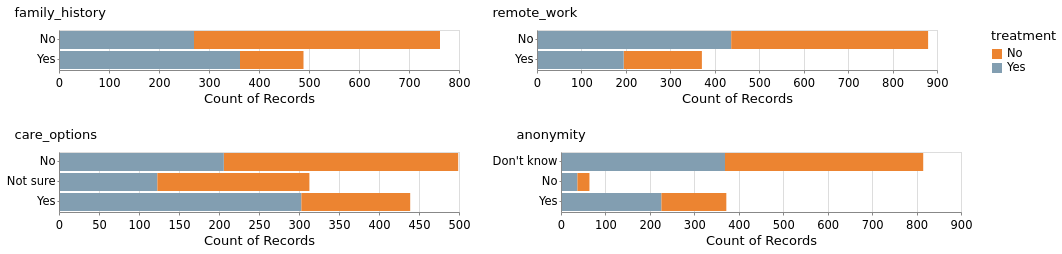

In [19]:
panel_chart2 = (plot_grouped_cat('family_history') | plot_grouped_cat('remote_work')) & (plot_grouped_cat('care_options') | plot_grouped_cat('anonymity'))
panel_chart2

## Save our figures

In [20]:
from datetime import date
date_stamp = date.today().strftime('%Y-%b-%d')
path = '../results'
hist_1.save(f'{path}/hist_1_{date_stamp}.png')
bar_1.save(f'{path}/bar_1_{date_stamp}.png')
bar_2.save(f'{path}/bar_2_{date_stamp}.png')
panel_chart1.save(f'{path}/panel_chart_1_{date_stamp}.png')
panel_chart2.save(f'{path}/panel_chart_2_{date_stamp}.png')

## Save Data

In [21]:
path = '../data'
tech_d.to_csv(f'{path}/mental_health_tech_data_post{date_stamp}.csv')